In [39]:
import os
import subprocess
import pandas as pd
from matplotlib_venn import venn3
from matplotlib_venn import venn2
import seaborn as sns

In [41]:
# Block of seaborn style settings
plt.rc('font', size=23) #controls default text size
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=2)

plt.rc('font', size=23) #controls default text size
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels

In [31]:
skempiMAX = pd.read_csv('skempiMAX.csv')

In [32]:
SAFES = pd.read_csv('SAFES_with_exp_val.csv')

In [34]:
S2536 = pd.read_csv('S2536.csv', sep=';', na_values='XXX')

In [25]:
with open('S2536_entry_index.txt', 'r') as file:
    S2536_entry_index = file.readlines()
    S2536_entry_index = [item.strip('\n') for item in S2536_entry_index]

In [26]:
with open('skempiMAX_entry_index.txt', 'r') as file:
    skempiMAX_entry_index = file.readlines()
    skempiMAX_entry_index = [item.strip('\n') for item in skempiMAX_entry_index]

In [27]:
with open('SAFES_entry_index.txt', 'r') as file:
    SAFES_entry_index = file.readlines()
    SAFES_entry_index = [item.strip('\n') for item in SAFES_entry_index]

In [ ]:
['#1f77b4', '#ff7f0e', '#2ca02c']

In [63]:
skempiMAX['ddG_bind'].median()

0.6997469544118875

In [64]:
S2536['DDGb'].median()

0.6904999999999999

In [69]:
(SAFES['ddG_bind'].median() + S2536['DDGb'].median())/2

0.7443145187054685

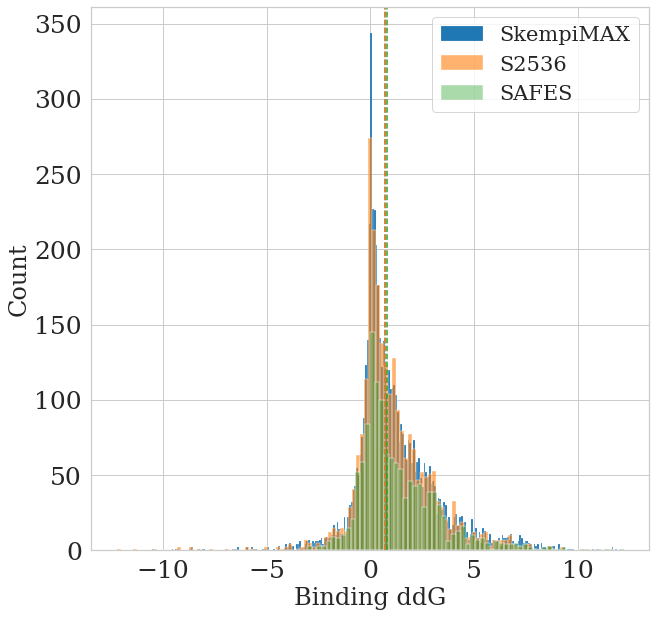

In [73]:
fig= plt.figure(figsize=(10, 10))
# sns.histplot(data=skempiMAX, x="ddG_bind", bins=180, color='r', alpha = 1, label='SKEMPI 2.0')
sns.histplot(data=skempiMAX, x="ddG_bind", bins=286, color='#1f77b4', alpha = 1, label='SkempiMAX')
plt.axvline(skempiMAX['ddG_bind'].median(), 0, 500, color='#1f77b4', ls='--', lw=1.5)
sns.histplot(data=S2536, x="DDGb", bins=127, color='#ff7f0e', alpha = 0.6, label='S2536')
plt.axvline(S2536['DDGb'].median(), 0, 500, color='#ff7f0e', ls='--', lw=1.5)
sns.histplot(data=SAFES, x="ddG_bind", bins=66, color='#2ca02c', alpha = 0.4, label='SAFES')
plt.axvline(SAFES['ddG_bind'].median(), 0, 500, color='#2ca02c', ls='--', lw=1.5)

plt.xlabel('Binding ddG')

plt.legend(fontsize=21)
plt.savefig("skempi_3_hist.pdf", format='pdf')

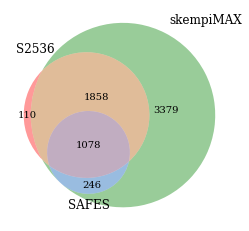

In [28]:
venn3((set(S2536_entry_index), set(skempiMAX_entry_index), set(SAFES_entry_index)), set_labels = ('S2536', 'skempiMAX', 'SAFES'))

/Users/jhn949/opt/anaconda3/envs/PyRosetta/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:165: UserWarning: normalize_to is deprecated. Please use layout_algorithm=matplotlib_venn.layout.venn3.DefaultLayoutAlgorithm(normalize_to) instead.
  warnings.warn(


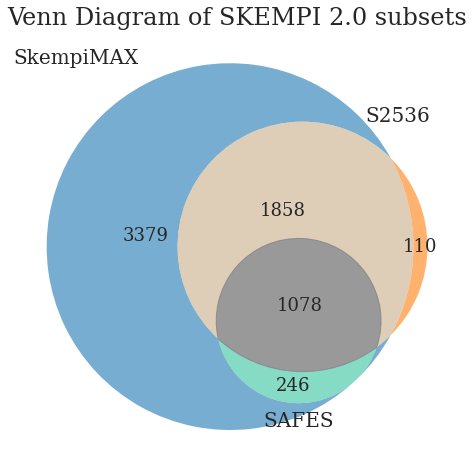

In [76]:
from matplotlib_venn import venn2, venn3
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

# --- Example Data ---
plt.rcParams['font.family'] = 'serif'
set_labels = ('SkempiMAX', 'S2536', 'SAFES')

plt.figure(figsize=(8, 8))

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Blue, Orange, Green

# 1. Plotting venn2 with increased subset count font size
v = venn3([set(skempiMAX_entry_index), set(S2536_entry_index), set(SAFES_entry_index)], 
    set_labels=set_labels,
    # Customize the font size for the numbers inside the regions
    # set_colors=('blue', 'red', 'yellow'),
    set_colors=custom_colors,
    alpha=0.6,
    normalize_to=1.0 # Ensures relative sizing is based on total items
)

# 1. Adjust the colors of the *intersections* (optional but useful)
# The regions are named based on their binary representation (e.g., '100' is Set A only)
# For the central intersection ('111'), you might want a custom color
v.get_patch_by_id('111').set_color(mcolors.to_rgb('gray'))
v.get_patch_by_id('111').set_alpha(0.8)

# # 2. Remove or change the border lines (edges) of the circles for a cleaner look
# for patch in v.patches:
#     patch.set_edgecolor('none') # Remove the border line
#     # Alternatively, you could set a thin black border:
#     # patch.set_edgecolor('black')
#     # patch.set_linewidth(0.5)

# 2. Increase font size for the set labels (A, B, C)
# The text objects for the set labels are stored in v.set_labels
for label in v.set_labels:
    if label is not None:
        label.set_fontsize(20) # Increase size for 'Dataset A', 'Dataset B'

# 3. Increase font size for the subset counts (numbers)
# This is done directly using the fontsize parameter in venn2/venn3, as shown above.
# If you need to access them later (e.g., to change color/style):
for text in v.subset_labels:
    if text is not None:
        text.set_fontsize(18) # Override or ensure consistency

plt.title("Venn Diagram of SKEMPI 2.0 subsets", fontsize=24)
#plt.tight_layout()
plt.savefig('skempi2_subsets_venn.pdf', format='pdf')  

In [89]:
skempi2['variant'] = reformat_muts
exp_cart_ddG_all = pd.merge(variants, skempi2, on=['PDB_ID', 'variant'], how='right')

for index, row in exp_cart_ddG_all.iterrows():
    if row['#Pdb'] in dict_mult_interface.keys():
        
        ddG_value = variants.loc[(variants['PDB_ID'] == dict_mult_interface[row['#Pdb']]
                     )&(variants['variant'] == row['variant'])]['mean_ddG'].values[0]
        std_value = variants.loc[(variants['PDB_ID'] == dict_mult_interface[row['#Pdb']]
                     )&(variants['variant'] == row['variant'])]['std_ddG'].values[0]

        # print('mean ddG', exp_cart_ddG_all.iloc[index, 1], ddG_value)
        # print('std', exp_cart_ddG_all.iloc[index, 2], std_value)
        # count += 1
        exp_cart_ddG_all.iloc[index, 1] = ddG_value
        exp_cart_ddG_all.iloc[index, 2] = std_value
        
exp_cart_ddG_all.loc[exp_cart_ddG_all['mean_ddG']>15, 'mean_ddG'] = 15
exp_cart_ddG_all['N_mut'] = exp_cart_ddG_all['variant'].str.split(':').str.len()
exp_cart_ddG_all['N_mut'] = exp_cart_ddG_all['N_mut'].apply(lambda x: '3+' if x >= 3 else x)
exp_cart_ddG_all['N_mut'] = exp_cart_ddG_all['N_mut'].apply(str)
#exp_cart_ddG_all.to_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/cart_pipeline_full_struct.csv', index=False)

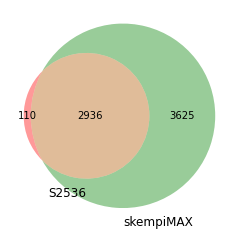

In [12]:
venn2((set(S2536_entry_index), set(skempiMAX_entry_index)), set_labels = ('S2536', 'skempiMAX'))

In [31]:
import seaborn as sns

In [32]:
skempi2 = pd.read_csv('skempi_v2.csv', sep=';')
skempi2['N_mut'] = skempi2['Mutation(s)_PDB'].str.split(',').str.len()

ValueError: Could not interpret value `ddG_bind` for parameter `x`

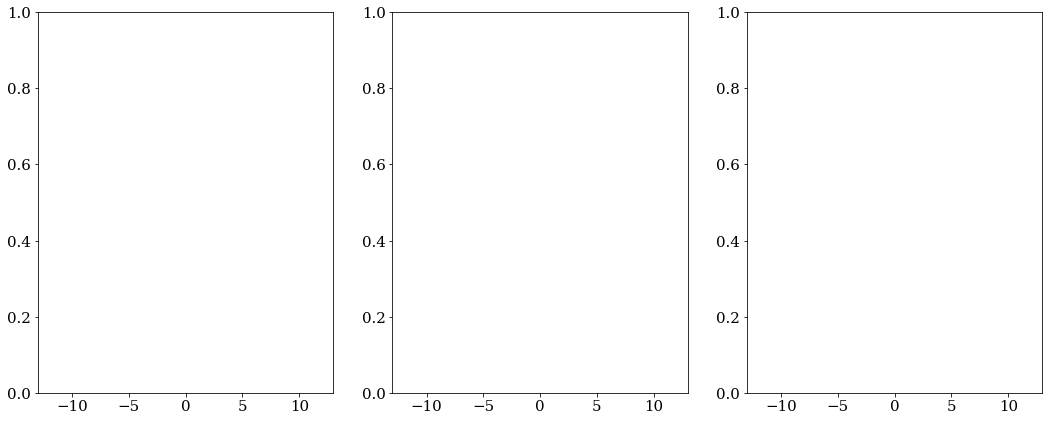

In [33]:
plt.rc('font', size=15) #controls default text size
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
#sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=1)

fig, axes = plt.subplots(1, 3, figsize=(18, 7))
plt.setp(axes, xlim=(-13, 13))
axes = axes.flatten()
df = skempi2.copy()
for ax, n in zip(axes, df['N_mut'].unique()):
    subset = df.loc[df['N_mut']==n]
    a = sns.histplot(data=subset, x="ddG_bind", hue='N_mut', ax=ax, alpha=0.5)
    a.set_title(f'Subset size: {len(subset)}', fontsize=22)
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Experimental binding ddG', ha='center', fontsize=24)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=24)
fig.suptitle('Cartesian ddG + InterfaceAnalyzer', fontsize=26)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('N_mut_ddG_hist.pdf', format='pdf')